In [64]:
import os
import datetime
import numpy as np
import pickle
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [65]:
csv_path = r"D:\01 Files\04 University\00 Internships and theses\2. AI internship\results\shape vs texture bias\texture_bias_regression_results.csv"
dataset = "OADS"

#csv_path = r"D:\01 Files\04 University\00 Internships and theses\2. AI internship\results\shape vs texture bias\IMAGENET_Texture_results.csv"
#dataset = "ImageNet-16"

In [66]:
# Read the csv
df = pd.read_csv(csv_path)


# remove fc layer when necessary
df = df[df['layer'] != 'fc2']


# Filter models, if necessary
selected_models = ["OADSx6", "STL10", "Untrained", "Supervised ResNet18"]
df = df[df['checkpoint'].isin(selected_models)]


In [67]:
# Define colors for whichever models we chose to keep it consistent...

# Dictionary mapping models to colors
model_colors = {
    'OADS': 'orange',
    'OADSx6': 'red',
    'OADSx30': 'purple',
    'STL10': 'yellow',
    'Untrained': 'blue',
    'Supervised ResNet18': 'green'  # Add more colors if needed
}

# Create a custom palette
colors_order = [model_colors[model] for model in df['checkpoint'].unique()]

colors_order

['red', 'yellow', 'blue', 'green']

In [ ]:
"""
title = f"Texture Bias on {dataset} cue conflict"

# Plot
plt.figure(figsize=(6, 6))
g= sns.barplot(data=df, x="layer", y="texture_bias", hue="checkpoint", dodge=True) #palette="pastel",
#sns.barplot(data=df, x="layer", y="shape_bias", hue="checkpoint", palette="dark", dodge=True, bottom=df["texture_bias"])
plt.title(title)
plt.ylabel("Texture bias (%)")
#plt.xlabel("Layer")
plt.legend(title="Checkpoint")
plt.xticks(rotation=45)
plt.tight_layout()

plt.ylim(0, 100)
plt.axhline(y=50, color='r', linestyle='--')
g.set_yticks(range(0,101,10)) 


plt.show()
"""
# DONT USE TEXTURE BIAS...


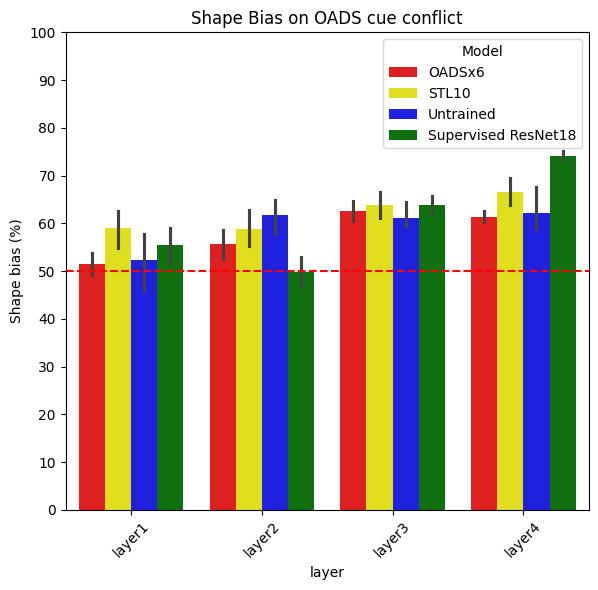

In [68]:
title = f"Shape Bias on {dataset} cue conflict"

plt.figure(figsize=(6, 6))

# plot all layers
g= sns.barplot(data=df, x="layer", y="shape_bias", hue="checkpoint", dodge=True, palette=colors_order)

plt.title(title)
plt.ylabel("Shape bias (%)")
#plt.xlabel("Layer")
plt.legend(title="Model")
plt.xticks(rotation=45)
plt.tight_layout()

plt.ylim(0, 100)
plt.axhline(y=50, color='r', linestyle='--')
g.set_yticks(range(0,101,10)) 


plt.show()


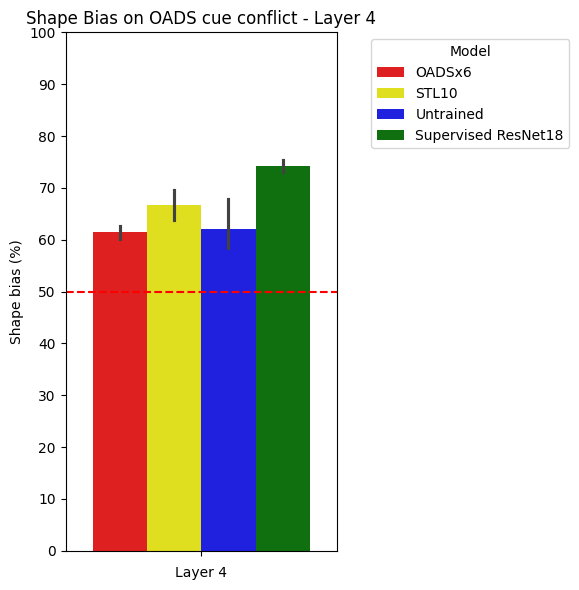

In [69]:
# Layer4 only...

title = f"Shape Bias on {dataset} cue conflict - Layer 4"

plt.figure(figsize=(6, 6))

# Plot one layer
layer4_data = df[df['layer'] == 'layer4']
g= sns.barplot(data=layer4_data, y="shape_bias", hue="checkpoint", dodge=True, palette=colors_order)
plt.xlabel("Layer 4")


plt.title(title)
plt.ylabel("Shape bias (%)")
plt.legend(title="Model", bbox_to_anchor=(1.1, 1), loc='upper left')
#plt.legend().remove()
plt.xticks(rotation=45)
plt.tight_layout()

plt.ylim(0, 100)
plt.axhline(y=50, color='r', linestyle='--')
g.set_yticks(range(0,101,10)) 


plt.show()


In [70]:
# Same data as the graph, print the numbers so I can add them to the report...

average_accuracy = df.groupby(['checkpoint', 'layer'])['shape_bias'].mean().reset_index()

print(average_accuracy)

             checkpoint   layer  shape_bias
0                OADSx6  layer1   51.448518
1                OADSx6  layer2   55.616165
2                OADSx6  layer3   62.536408
3                OADSx6  layer4   61.387847
4                 STL10  layer1   59.090532
5                 STL10  layer2   58.896570
6                 STL10  layer3   63.836481
7                 STL10  layer4   66.613754
8   Supervised ResNet18  layer1   55.402293
9   Supervised ResNet18  layer2   49.798433
10  Supervised ResNet18  layer3   63.836130
11  Supervised ResNet18  layer4   74.151793
12            Untrained  layer1   52.348933
13            Untrained  layer2   61.719877
14            Untrained  layer3   61.197764
15            Untrained  layer4   62.141550


In [30]:
# t statistics Stats - shape bias

import pandas as pd
from itertools import combinations
from scipy.stats import ttest_ind


#df = df_oc

# Get unique combinations of checkpoint and layer
checkpoints = df['checkpoint'].unique()
#checkpoints = selected_models
layers = df['layer'].unique()

ns_count = 0
s_count = 0

print(dataset)

for layer in layers:    
    # Iterate over combinations of checkpoints for comparison
    for checkpoint1, checkpoint2 in combinations(checkpoints, 2):
        # Filter data for the two checkpoints and current layer
        model1_data = df[(df['checkpoint'] == checkpoint1) & (df['layer'] == layer)]['shape_bias']
        model2_data = df[(df['checkpoint'] == checkpoint2) & (df['layer'] == layer)]['shape_bias']
        
        # Perform independent t-test
        t_statistic, p_value = ttest_ind(model1_data, model2_data)

        if p_value < 0.05:
            # Print the results if the p-value is significant
            print(f"Comparison between {checkpoint1} and {checkpoint2} for layer {layer}:")
            print("T-statistic:", t_statistic)
            print(f"P-value: {p_value:.6f}")
            print()  # Add a newline for readability
            s_count += 1
        else:
            ns_count += 1
            #print(f"P-value: {p_value:.6f}")

    
    print()

print(f"Significant ones: {s_count}")
print(f"Non-significant ones: {ns_count}")
            

ImageNet-16


Comparison between OADSx6 and STL10 for layer layer3:
T-statistic: -2.5171677908219845
P-value: 0.020967

Comparison between OADSx6 and Untrained for layer layer3:
T-statistic: -2.312074630666059
P-value: 0.039328

Comparison between OADSx6 and Supervised ResNet18 for layer layer3:
T-statistic: -5.853628105755167
P-value: 0.000078


Comparison between OADSx6 and Supervised ResNet18 for layer layer4:
T-statistic: -15.477809746446404
P-value: 0.000000

Comparison between STL10 and Supervised ResNet18 for layer layer4:
T-statistic: -6.845016962407461
P-value: 0.000006

Comparison between Untrained and Supervised ResNet18 for layer layer4:
T-statistic: -10.656884888863837
P-value: 0.000005


Significant ones: 6
Non-significant ones: 18


In [31]:
# ANOVA
# Stats - shape bias

import pandas as pd
from itertools import combinations
from scipy.stats import ttest_ind
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import MultiComparison


#df = df_oc

# Get unique combinations of checkpoint and layer
checkpoints = df['checkpoint'].unique()
#checkpoints = selected_models
layers = df['layer'].unique()

ns_count = 0
s_count = 0

print(dataset)

# Iterate over layers
for layer in layers:
    # Create an empty list to store data for each checkpoint
    checkpoint_data = []
    
    # Iterate over checkpoints
    for checkpoint in checkpoints:
        # Filter data for the current checkpoint and layer
        data = df[(df['checkpoint'] == checkpoint) & (df['layer'] == layer)]['shape_bias']
        checkpoint_data.append(data)
    
    # Perform ANOVA
    f_value, p_value = f_oneway(*checkpoint_data)

    if p_value < 0.05:
        # Conduct Tukey's HSD test for pairwise comparisons
        multi_comp = MultiComparison(np.concatenate(checkpoint_data), np.concatenate([[i] * len(checkpoint_data[i]) for i in range(len(checkpoint_data))]))
        tukey_results = multi_comp.tukeyhsd()
        
        # Extract significant pairwise comparisons and their p-values
        pairs = list(combinations(checkpoints, 2))
        significant_pairs = [(pair, p_val) for pair, p_val in zip(pairs, tukey_results.pvalues) if p_val < 0.05]
        
        if significant_pairs:
            # Print the significant pairwise comparisons and their p-values
            print(f"Significant pairwise comparisons for layer {layer}:")
            for pair, p_val in significant_pairs:
                significance = ''
                if p_val < 0.001:
                    significance = '***'
                elif p_val < 0.01:
                    significance = '**'
                elif p_val < 0.05:
                    significance = '*'
                print(f"{pair[0]} vs {pair[1]}: p-value = {p_val:.6f} {significance}")
        else:
            print(f"No significant pairwise comparisons for layer {layer}.")
    else:
        print(f"No significant differences among means for layer {layer}.")
    print(f"f-value: {f_value}")
    print()


#print(f"Significant ones: {s_count}")
#print(f"Non-significant ones: {ns_count}")
            

ImageNet-16
No significant differences among means for layer layer1.
f-value: 1.2219442552287023

No significant differences among means for layer layer2.
f-value: 0.5491638741896834

Significant pairwise comparisons for layer layer3:
OADSx6 vs Supervised ResNet18: p-value = 0.009613 **
f-value: 4.377740788149681

Significant pairwise comparisons for layer layer4:
OADSx6 vs Supervised ResNet18: p-value = 0.000000 ***
STL10 vs Supervised ResNet18: p-value = 0.000000 ***
Untrained vs Supervised ResNet18: p-value = 0.000000 ***
f-value: 40.04148302427469



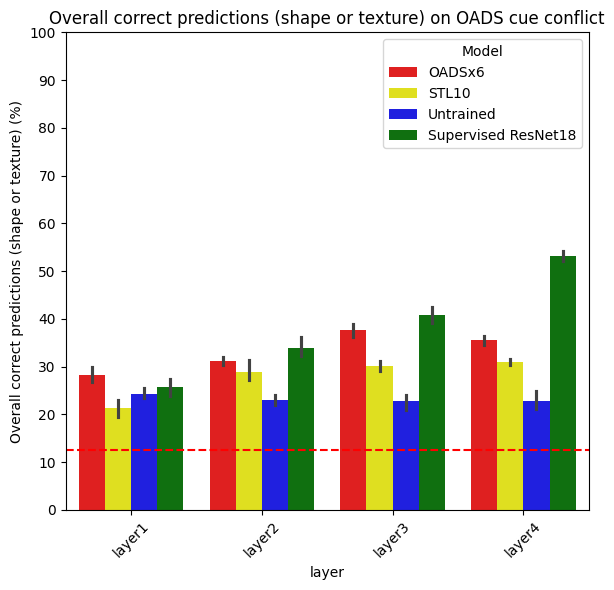

In [71]:
title = f"Overall correct predictions (shape or texture) on {dataset} cue conflict"

# Plot
plt.figure(figsize=(6, 6))
g= sns.barplot(data=df, x="layer", y="overall_correct", hue="checkpoint", dodge=True, palette=colors_order)
#sns.barplot(data=df, x="layer", y="shape_bias", hue="checkpoint", palette="dark", dodge=True, bottom=df["texture_bias"])
plt.title(title)
plt.ylabel("Overall correct predictions (shape or texture) (%)")
#plt.xlabel("Layer")
plt.legend(title="Model")
plt.xticks(rotation=45)
plt.tight_layout()

plt.ylim(0, 100)
plt.axhline(y=12.5, color='r', linestyle='--')
g.set_yticks(range(0,101,10)) 


plt.show()


In [72]:
# Same data as the graph, print the numbers so I can add them to the report...

average_accuracy = df.groupby(['checkpoint', 'layer'])['overall_correct'].mean().reset_index()

print(average_accuracy)

             checkpoint   layer  overall_correct
0                OADSx6  layer1        28.263889
1                OADSx6  layer2        31.215278
2                OADSx6  layer3        37.557870
3                OADSx6  layer4        35.486111
4                 STL10  layer1        21.406250
5                 STL10  layer2        28.958333
6                 STL10  layer3        30.166667
7                 STL10  layer4        30.864583
8   Supervised ResNet18  layer1        25.677083
9   Supervised ResNet18  layer2        33.968750
10  Supervised ResNet18  layer3        40.750000
11  Supervised ResNet18  layer4        53.239583
12            Untrained  layer1        24.244792
13            Untrained  layer2        23.046875
14            Untrained  layer3        22.682292
15            Untrained  layer4        22.786458


In [ ]:
# Stats - overall accuracy

import pandas as pd
from itertools import combinations
from scipy.stats import ttest_ind


#df = df_oc

# Get unique combinations of checkpoint and layer
checkpoints = df['checkpoint'].unique()
#checkpoints = selected_models
layers = df['layer'].unique()

ns_count = 0
s_count = 0

for layer in layers:    
    # Iterate over combinations of checkpoints for comparison
    for checkpoint1, checkpoint2 in combinations(checkpoints, 2):
        # Filter data for the two checkpoints and current layer
        model1_data = df[(df['checkpoint'] == checkpoint1) & (df['layer'] == layer)]['overall_correct']
        model2_data = df[(df['checkpoint'] == checkpoint2) & (df['layer'] == layer)]['overall_correct']
        
        # Perform independent t-test
        t_statistic, p_value = ttest_ind(model1_data, model2_data)

        if p_value < 0.05:
            # Print the results if the p-value is significant
            print(f"Comparison between {checkpoint1} and {checkpoint2} for layer {layer}:")
            print("T-statistic:", t_statistic)
            print(f"P-value: {p_value:.6f}")
            print()  # Add a newline for readability
            s_count += 1
        else:
            ns_count += 1
            #print(f"P-value: {p_value:.6f}")

    
    print()

print(f"Significant ones: {s_count}")
print(f"Non-significant ones: {ns_count}")
            

In [73]:
# ANOVA
# Stats - shape bias

import pandas as pd
from itertools import combinations
from scipy.stats import ttest_ind
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import MultiComparison


#df = df_oc

# Get unique combinations of checkpoint and layer
checkpoints = df['checkpoint'].unique()
#checkpoints = selected_models
layers = df['layer'].unique()

ns_count = 0
s_count = 0

print(dataset)

# Iterate over layers
for layer in layers:
    # Create an empty list to store data for each checkpoint
    checkpoint_data = []
    
    # Iterate over checkpoints
    for checkpoint in checkpoints:
        # Filter data for the current checkpoint and layer
        data = df[(df['checkpoint'] == checkpoint) & (df['layer'] == layer)]['overall_correct']
        checkpoint_data.append(data)
    
    # Perform ANOVA
    f_value, p_value = f_oneway(*checkpoint_data)

    if p_value < 0.05:
        # Conduct Tukey's HSD test for pairwise comparisons
        multi_comp = MultiComparison(np.concatenate(checkpoint_data), np.concatenate([[i] * len(checkpoint_data[i]) for i in range(len(checkpoint_data))]))
        tukey_results = multi_comp.tukeyhsd()
        
        # Extract significant pairwise comparisons and their p-values
        pairs = list(combinations(checkpoints, 2))
        significant_pairs = [(pair, p_val) for pair, p_val in zip(pairs, tukey_results.pvalues) if p_val < 0.05]
        
        if significant_pairs:
            # Print the significant pairwise comparisons and their p-values
            print(f"Significant pairwise comparisons for layer {layer}:")
            for pair, p_val in significant_pairs:
                significance = ''
                if p_val < 0.001:
                    significance = '***'
                elif p_val < 0.01:
                    significance = '**'
                elif p_val < 0.05:
                    significance = '*'
                print(f"{pair[0]} vs {pair[1]}: p-value = {p_val:.6f} {significance}")
        else:
            print(f"No significant pairwise comparisons for layer {layer}.")
    else:
        print(f"No significant differences among means for layer {layer}.")
    print(f"f-value: {f_value}")
    print()


#print(f"Significant ones: {s_count}")
#print(f"Non-significant ones: {ns_count}")
            

OADS
Significant pairwise comparisons for layer layer1:
OADSx6 vs STL10: p-value = 0.000037 ***
STL10 vs Supervised ResNet18: p-value = 0.007590 **
f-value: 10.45162652952938

Significant pairwise comparisons for layer layer2:
OADSx6 vs Untrained: p-value = 0.000344 ***
STL10 vs Untrained: p-value = 0.009159 **
STL10 vs Supervised ResNet18: p-value = 0.003137 **
Untrained vs Supervised ResNet18: p-value = 0.000004 ***
f-value: 14.623707228935109

Significant pairwise comparisons for layer layer3:
OADSx6 vs STL10: p-value = 0.000001 ***
OADSx6 vs Untrained: p-value = 0.000000 ***
OADSx6 vs Supervised ResNet18: p-value = 0.026594 *
STL10 vs Untrained: p-value = 0.000040 ***
STL10 vs Supervised ResNet18: p-value = 0.000000 ***
Untrained vs Supervised ResNet18: p-value = 0.000000 ***
f-value: 75.95667240313679

Significant pairwise comparisons for layer layer4:
OADSx6 vs STL10: p-value = 0.000005 ***
OADSx6 vs Untrained: p-value = 0.000000 ***
OADSx6 vs Supervised ResNet18: p-value = 0.000

In [ ]:
########################





#### CLASSIFICATION #### 





########################

In [56]:
# Same but for object classification

import os
import datetime
import numpy as np
import pickle
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

csv_path_oc = r"D:\01 Files\04 University\00 Internships and theses\2. AI internship\results\imagenet_obj_class_accuracies.csv"
dataset_oc = "ImageNet-16"

#csv_path_oc = r"D:\01 Files\04 University\00 Internships and theses\2. AI internship\results\object_classification_accuracies.csv"
#dataset_oc = "OADS"

# Read the csv
df_oc = pd.read_csv(csv_path_oc)


# Filter models
#selected_models = ["OADS", "OADSx6", "OADSx30"]
selected_models = ["OADSx6", "STL10", "Untrained", "Supervised ResNet18"]
df_oc = df_oc[df_oc['checkpoint'].isin(selected_models)]

# Remove the fc layer if necessary
df_oc = df_oc[df_oc['layer'] != 'fc2']


# Define colors for whichever models we chose to keep it consistent...
model_colors = {
    'OADS': 'orange',
    'OADSx6': 'red',
    'OADSx30': 'purple',
    'STL10': 'yellow',
    'Untrained': 'blue',
    'Supervised ResNet18': 'green'  # Add more colors if needed
}
# Create a custom palette
colors_order = [model_colors[model] for model in df_oc['checkpoint'].unique()]

colors_order



['red', 'yellow', 'blue', 'green']

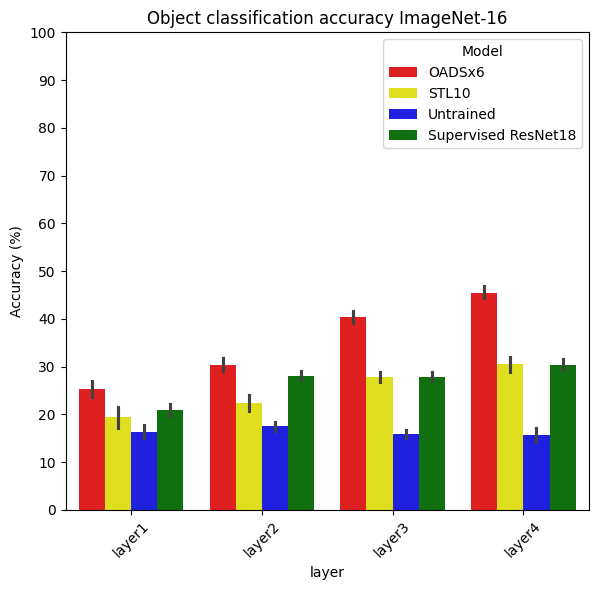

In [57]:
#Plot classification accuracies...

title = f"Object classification accuracy {dataset_oc}"

# Plot
plt.figure(figsize=(6, 6))

# Plot individual layers:
g= sns.barplot(data=df_oc, x="layer", y="accuracy", hue="checkpoint", dodge=True, palette=colors_order)

# Plot one layer instead
#layer4_data = df_oc[df_oc['layer'] == 'layer4']
#g= sns.barplot(data=layer4_data, y="accuracy", hue="checkpoint", dodge=True, palette=colors_order)

# Add stuff
plt.title(title)
plt.ylabel("Accuracy (%)")
#plt.xlabel("Layer")
plt.legend(title="Model")
#plt.legend(title="Model", bbox_to_anchor=(1.1, 1), loc='upper left')
#plt.legend().remove()
plt.xticks(rotation=45)
plt.tight_layout()

plt.ylim(0, 100)
#plt.axhline(y=6.25, color='r', linestyle='--')
g.set_yticks(range(0,101,10)) 


#plt.plot([1,2], [70, 70], color='k')


plt.show()

In [58]:
# Same data as the graph, print the numbers so I can add them to the report...

average_accuracy = df_oc.groupby(['checkpoint', 'layer'])['accuracy'].mean().reset_index()

print(average_accuracy)

             checkpoint   layer   accuracy
0                OADSx6  layer1  25.271868
1                OADSx6  layer2  30.401891
2                OADSx6  layer3  40.330969
3                OADSx6  layer4  45.508274
4                 STL10  layer1  19.361702
5                 STL10  layer2  22.458629
6                 STL10  layer3  27.872340
7                 STL10  layer4  30.567376
8   Supervised ResNet18  layer1  20.961387
9   Supervised ResNet18  layer2  28.116627
10  Supervised ResNet18  layer3  27.895981
11  Supervised ResNet18  layer4  30.323089
12            Untrained  layer1  16.312057
13            Untrained  layer2  17.517730
14            Untrained  layer3  15.910165
15            Untrained  layer4  15.744681


In [59]:
# Stats

import pandas as pd
from itertools import combinations
from scipy.stats import ttest_ind


# Get unique combinations of checkpoint and layer
checkpoints = df_oc['checkpoint'].unique()

layers = df_oc['layer'].unique()

ns_count = 0
s_count = 0


for layer in layers:    
    # Iterate over combinations of checkpoints for comparison
    for checkpoint1, checkpoint2 in combinations(checkpoints, 2):
        # Filter data for the two checkpoints and current layer
        model1_data = df_oc[(df_oc['checkpoint'] == checkpoint1) & (df_oc['layer'] == layer)]['accuracy']
        model2_data = df_oc[(df_oc['checkpoint'] == checkpoint2) & (df_oc['layer'] == layer)]['accuracy']

        print(model1_data.to_list())
        print(model2_data.to_list())
        
        # Perform independent t-test
        #t_statistic, p_value = ttest_ind(model1_data, model2_data)
        t_statistic, p_value = ttest_ind(model1_data.to_list(), model2_data.to_list())
        
        if p_value < 0.05:
            # Print the results if the p-value is significant
            print(f"Comparison between {checkpoint1} and {checkpoint2} for layer {layer}:")
            print("T-statistic:", t_statistic)
            print(f"P-value: {p_value:.6f}")
            print()  # Add a newline for readability
            s_count += 1
        else:
            ns_count += 1
    
    # Print counts for significant and non-significant comparisons for each layer
    print()

print(f"Significant ones: {s_count}")
print(f"Non-significant ones: {ns_count}")
            

[24.822695035460992, 21.04018912529551, 22.93144208037825, 24.822695035460992, 24.822695035460992, 24.113475177304963, 26.95035460992908, 23.404255319148938, 30.969267139479907, 28.841607565011824]
[17.257683215130022, 15.839243498817968, 22.458628841607563, 23.404255319148938, 18.912529550827426, 12.529550827423169, 18.2033096926714, 22.69503546099291, 18.67612293144208, 23.64066193853428]
Comparison between OADSx6 and STL10 for layer layer1:
T-statistic: 3.98744425481136
P-value: 0.000864

[24.822695035460992, 21.04018912529551, 22.93144208037825, 24.822695035460992, 24.822695035460992, 24.113475177304963, 26.95035460992908, 23.404255319148938, 30.969267139479907, 28.841607565011824]
[18.2033096926714, 21.04018912529551, 16.548463356973993, 17.494089834515368, 16.07565011820331, 16.78486997635934, 13.47517730496454, 14.184397163120568, 14.420803782505912, 14.893617021276595]
Comparison between OADSx6 and Untrained for layer layer1:
T-statistic: 7.674553102272767
P-value: 0.000000

[2

In [60]:
# ANOVA VERSION Stats - overall accuracy

import pandas as pd
from itertools import combinations
from scipy.stats import ttest_ind


#df = df_oc

# Get unique combinations of checkpoint and layer
checkpoints = df_oc['checkpoint'].unique()
#checkpoints = selected_models
layers = df_oc['layer'].unique()

ns_count = 0
s_count = 0

# Iterate over layers
for layer in layers:
    # Create an empty list to store data for each checkpoint
    checkpoint_data = []
    
    # Iterate over checkpoints
    for checkpoint in checkpoints:
        # Filter data for the current checkpoint and layer
        data = df_oc[(df_oc['checkpoint'] == checkpoint) & (df_oc['layer'] == layer)]['accuracy']
        checkpoint_data.append(data)
    
    # Perform ANOVA
    f_value, p_value = f_oneway(*checkpoint_data)

    if p_value < 0.05:
        # Conduct Tukey's HSD test for pairwise comparisons
        multi_comp = MultiComparison(np.concatenate(checkpoint_data), np.concatenate([[i] * len(checkpoint_data[i]) for i in range(len(checkpoint_data))]))
        tukey_results = multi_comp.tukeyhsd()
        
        # Extract significant pairwise comparisons and their p-values
        pairs = list(combinations(checkpoints, 2))
        significant_pairs = [(pair, p_val) for pair, p_val in zip(pairs, tukey_results.pvalues) if p_val < 0.05]
        
        if significant_pairs:
            # Print the significant pairwise comparisons and their p-values
            print(f"Significant pairwise comparisons for layer {layer}:")
            for pair, p_val in significant_pairs:
                significance = ''
                if p_val < 0.001:
                    significance = '***'
                elif p_val < 0.01:
                    significance = '**'
                elif p_val < 0.05:
                    significance = '*'
                print(f"{pair[0]} vs {pair[1]}: p-value = {p_val:.6f} {significance}")
        else:
            print(f"No significant pairwise comparisons for layer {layer}.")
        print(f"f-value: {f_value}")
        print()

    else:
        print(f"No significant differences among means for layer {layer}.")
        print()


print(f"Significant ones: {s_count}")
print(f"Non-significant ones: {ns_count}")

Significant pairwise comparisons for layer layer1:
OADSx6 vs STL10: p-value = 0.000184 ***
OADSx6 vs Untrained: p-value = 0.000000 ***
OADSx6 vs Supervised ResNet18: p-value = 0.003139 **
Untrained vs Supervised ResNet18: p-value = 0.001330 **
f-value: 17.436350532895368

Significant pairwise comparisons for layer layer2:
OADSx6 vs STL10: p-value = 0.000000 ***
OADSx6 vs Untrained: p-value = 0.000000 ***
STL10 vs Untrained: p-value = 0.000073 ***
STL10 vs Supervised ResNet18: p-value = 0.000001 ***
Untrained vs Supervised ResNet18: p-value = 0.000000 ***
f-value: 71.41452540938258

Significant pairwise comparisons for layer layer3:
OADSx6 vs STL10: p-value = 0.000000 ***
OADSx6 vs Untrained: p-value = 0.000000 ***
OADSx6 vs Supervised ResNet18: p-value = 0.000000 ***
STL10 vs Untrained: p-value = 0.000000 ***
Untrained vs Supervised ResNet18: p-value = 0.000000 ***
f-value: 263.3520377458429

Significant pairwise comparisons for layer layer4:
OADSx6 vs STL10: p-value = 0.000000 ***
OAD